In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.image import rgb_to_grayscale, decode_jpeg
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage import io, color, filters
from skimage.transform import resize, rotate
from scipy.misc import imread
import matplotlib.pyplot as plt

In [14]:
decode_jpeg(tf.io.read_file('../data/gray/all/lines/164_img_239_14.png'))

<tf.Tensor: id=16, shape=(30, 30, 4), dtype=uint8, numpy=
array([[[255, 255, 255, 255],
        [130, 130, 130, 255],
        [125, 125, 125, 255],
        ...,
        [130, 130, 130, 255],
        [121, 121, 121, 255],
        [121, 121, 121, 255]],

       [[255, 255, 255, 255],
        [125, 125, 125, 255],
        [117, 117, 117, 255],
        ...,
        [113, 113, 113, 255],
        [117, 117, 117, 255],
        [117, 117, 117, 255]],

       [[255, 255, 255, 255],
        [117, 117, 117, 255],
        [117, 117, 117, 255],
        ...,
        [109, 109, 109, 255],
        [105, 105, 105, 255],
        [113, 113, 113, 255]],

       ...,

       [[255, 255, 255, 255],
        [130, 130, 130, 255],
        [121, 121, 121, 255],
        ...,
        [138, 138, 138, 255],
        [125, 125, 125, 255],
        [130, 130, 130, 255]],

       [[255, 255, 255, 255],
        [125, 125, 125, 255],
        [125, 125, 125, 255],
        ...,
        [121, 121, 121, 255],
        [121, 12

In [15]:
import pdb

def prep_data(x):
    pdb.set_trace()
    gray = rgb_to_grayscale(x)
    return gray

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
        '../data/gray/all/',
        target_size=(30, 30),
        color_mode = 'grayscale',
        batch_size=1,
        class_mode='binary',
        shuffle=True)

Found 7094 images belonging to 2 classes.


In [66]:
x,y = train_generator.next()
x = x.reshape((30, 30))

In [67]:
x.shape

(30, 30)

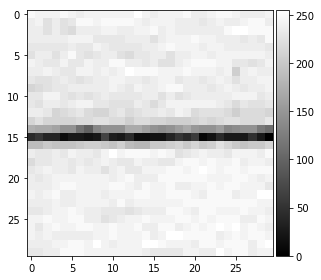

In [68]:
io.imshow(x*255, cmap = 'gray')

In [69]:
x

array([[0.97647065, 0.95294124, 0.95294124, 0.95294124, 0.97647065,
        0.95294124, 0.9294118 , 0.95294124, 0.95294124, 0.95294124,
        0.95294124, 0.95294124, 0.95294124, 1.        , 0.95294124,
        0.9294118 , 0.95294124, 0.95294124, 0.95294124, 0.97647065,
        0.9294118 , 0.9294118 , 0.95294124, 0.97647065, 0.97647065,
        0.95294124, 0.9294118 , 0.9294118 , 0.9294118 , 0.95294124],
       [0.9294118 , 0.95294124, 0.882353  , 0.9294118 , 0.882353  ,
        0.9058824 , 0.97647065, 0.97647065, 0.95294124, 0.97647065,
        0.97647065, 0.97647065, 0.97647065, 0.95294124, 0.9294118 ,
        0.95294124, 0.95294124, 0.95294124, 0.9294118 , 0.9294118 ,
        0.9294118 , 0.9058824 , 0.9294118 , 0.95294124, 0.9294118 ,
        0.9294118 , 0.95294124, 0.97647065, 0.97647065, 0.9294118 ],
       [0.9294118 , 0.9294118 , 0.882353  , 0.9294118 , 0.882353  ,
        0.8588236 , 0.9294118 , 0.9294118 , 0.9294118 , 0.95294124,
        0.95294124, 0.9294118 , 0.9294118 , 0.

In [49]:
def converter(x):

    weights = K.constant([[[[0.21 , 0.72 , 0.07]]]])
    return K.sum(x*weights, axis=-1,keepdims=True)

In [77]:
x = imread('../data/gray/all/lines/183_img_300_353.png')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [78]:
x.shape

(30, 30, 4)

In [81]:
x[:, :, :3]

(30, 30, 3)

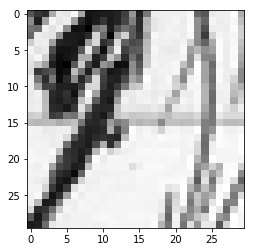

In [84]:
plt.imshow(x[:, :, :3])

array([[[ 86,  86,  86, 255],
        [ 54,  54,  54, 255],
        [ 44,  44,  44, 255],
        ...,
        [240, 240, 240, 255],
        [251, 251, 251, 255],
        [173, 173, 173, 255]],

       [[140, 140, 140, 255],
        [ 30,  30,  30, 255],
        [160, 160, 160, 255],
        ...,
        [239, 239, 239, 255],
        [246, 246, 246, 255],
        [190, 190, 190, 255]],

       [[115, 115, 115, 255],
        [109, 109, 109, 255],
        [242, 242, 242, 255],
        ...,
        [237, 237, 237, 255],
        [251, 251, 251, 255],
        [207, 207, 207, 255]],

       ...,

       [[217, 217, 217, 255],
        [ 44,  44,  44, 255],
        [ 52,  52,  52, 255],
        ...,
        [103, 103, 103, 255],
        [216, 216, 216, 255],
        [248, 248, 248, 255]],

       [[ 89,  89,  89, 255],
        [ 24,  24,  24, 255],
        [ 73,  73,  73, 255],
        ...,
        [134, 134, 134, 255],
        [255, 255, 255, 255],
        [243, 243, 243, 255]],

       [[ 27